In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('bmh')
from numpy import *

In [2]:
# Parametros
H0 = 67.5      # Constante de Hubble [km/s/Mpc]
c = 299792.458  # Velocidad de la luz [km/s]
Om_r = 9e-5  # radiation density today (photons + neutrinos)

In [3]:
def E(z, Om_r, Om_m, Om_k, Om_l):
    E = sqrt(Om_r*(1 + z)**4               # Radiación
             +Om_m*(1 + z)**3              # Materia 
             +Om_k*(1 + z)**2              # Curvatura  
             +Om_l)             
    return E

# Distacia comovil
def Dc(z, Om_r, Om_m, Om_l):
    Om_k = 1 - Om_r - Om_m - Om_l
               # Cte. Cosmológica
    Ez = E(zs, Om_r, Om_m, Om_k, Om_l)
    
    integral = trapz(1/Ez, z)  # Integral método del trapezide
    chi = (c / H0) * integral  # in Mpc    # Distancia comovil
    return chi, Om_k

In [4]:
# Transverse Comoving Distance [Mpc]
def fk_chi(chi, Om_k):
    if (Om_k == 0.) :
        return chi
    elif (Om_k > 0.) :
        return c/(H0*sqrt(Om_k)) * sinh(sqrt(Om_k) * chi * H0/c)
    elif (Om_k < 0.) :
        return c/(H0*sqrt(-Om_k)) * sin(sqrt(-Om_k) * chi * H0/c)

In [5]:
# Grilla de Ωm,0 - ΩΛ,0
Om_ms = linspace(0., 3, 200)
Om_ls = linspace(-1., 3, 200)
Om_m_grid, Om_l_grid = meshgrid(Om_ms, Om_ls)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29296\4257854217.py:2: RuntimeWarning: invalid value encountered in sqrt
  E = sqrt(Om_r*(1 + z)**4               # Radiación
C:\Users\Usuario\AppData\Local\Temp\ipykernel_29296\3735999423.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


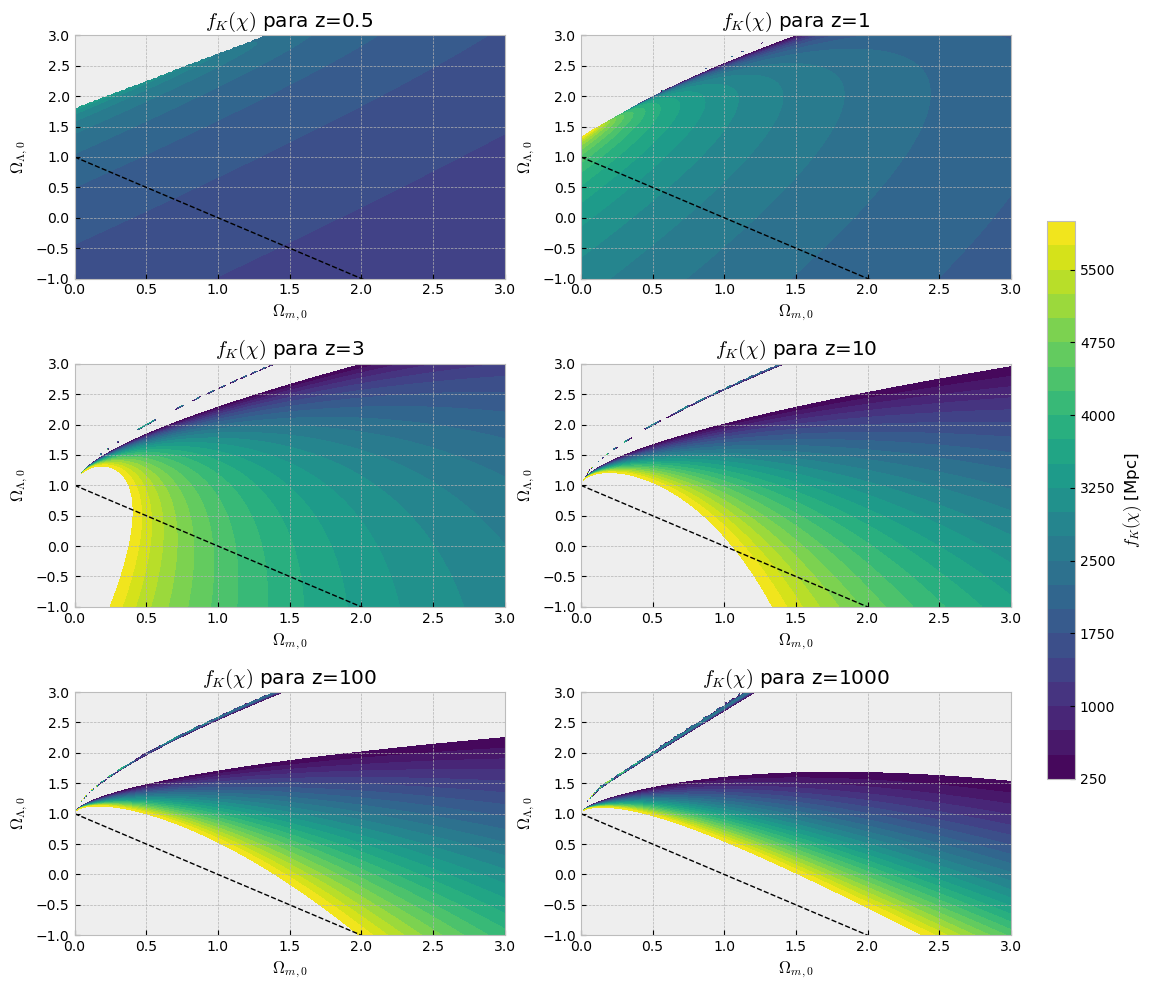

In [6]:
# Valores de redshif a gráficar
z_plot = [0.5, 1, 3,10, 100, 1000]

fig, axes = plt.subplots(3, 2, figsize=(12,10))
axes = axes.flatten()

for k in range(len(z_plot)):
    # Rango de Redshift
    zs = linspace(0, z_plot[k], 800)  

    fk_grid = zeros_like(Om_m_grid)

    for i in range(Om_m_grid.shape[0]):
        for j in range(Om_l_grid.shape[1]):
            Om_m = Om_m_grid[i, j]
            Om_l = Om_l_grid[i, j]
            chi, Om_k = Dc(zs, Om_r, Om_m, Om_l)
            fk_grid[i, j] = fk_chi(chi, Om_k)
            
    # Niveles coloreados (en Mpc)
    levels = list(linspace(250, 6000, 24))
    
    ax = axes[k]
    cf = ax.contourf(Om_m_grid, Om_l_grid, fk_grid, levels=levels, cmap='viridis', vmin=250, vmax=6000)
    
    # Caso en que el espacio es plano (ΩK,0 = 0.)
    ax.plot(Om_ms, 1.0 - Om_ms - Om_r,color = 'black', linestyle='--', linewidth=1, label=r'$\Omega_{k}=0$')
    ax.set_xlabel(r'$\Omega_{m,0}$')
    ax.set_ylabel(r'$\Omega_{\Lambda,0}$')
    ax.set_title(f'$f_K(\chi)$ para z='+str(z_plot[k]))
    
    ax.set_xlim(0, 3)     # Límite de Ωm,0
    ax.set_ylim(-1, 3)    # Límite de ΩΛ,0
    
cbar = fig.colorbar(cf, ax=axes, orientation='vertical', fraction=0.03, pad=-0.2, shrink=1.5 )
cbar.set_label(r'$f_K(\chi)$ [Mpc]')
plt.tight_layout()

plt.savefig("P7-Grafico.png")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29296\4257854217.py:2: RuntimeWarning: invalid value encountered in sqrt
  E = sqrt(Om_r*(1 + z)**4               # Radiación
C:\Users\Usuario\AppData\Local\Temp\ipykernel_29296\2705649766.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


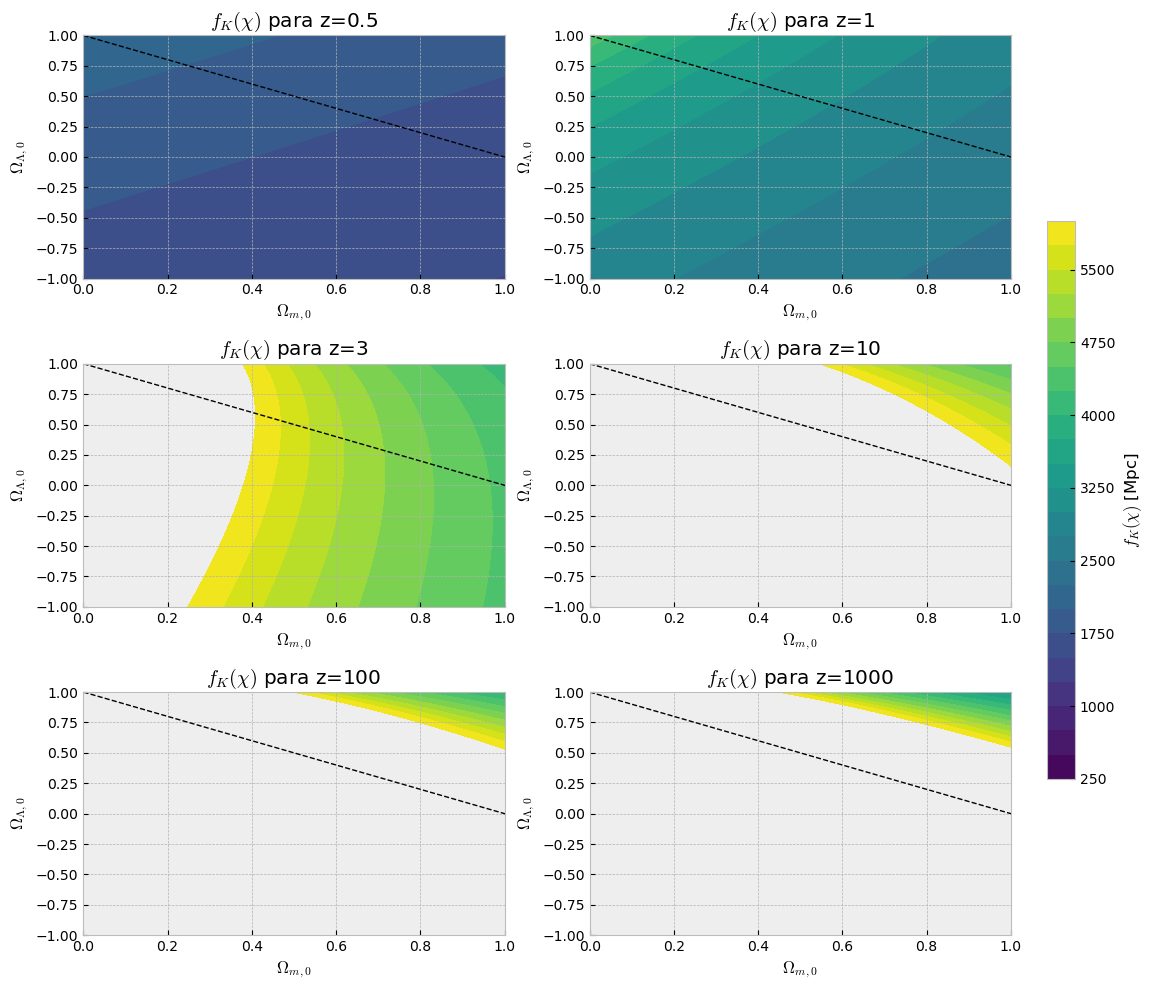

In [7]:
# Valores de redshif a gráficar
z_plot = [0.5, 1, 3,10, 100, 1000]

fig, axes = plt.subplots(3, 2, figsize=(12,10))
axes = axes.flatten()

for k in range(len(z_plot)):
    # Rango de Redshift
    zs = linspace(0, z_plot[k], 800)  

    fk_grid = zeros_like(Om_m_grid)

    for i in range(Om_m_grid.shape[0]):
        for j in range(Om_l_grid.shape[1]):
            Om_m = Om_m_grid[i, j]
            Om_l = Om_l_grid[i, j]
            chi, Om_k = Dc(zs, Om_r, Om_m, Om_l)
            fk_grid[i, j] = fk_chi(chi, Om_k)
            
    # Niveles coloreados (en Mpc)
    levels = list(linspace(250, 6000, 24))
    
    ax = axes[k]
    cf = ax.contourf(Om_m_grid, Om_l_grid, fk_grid, levels=levels, cmap='viridis', vmin=250, vmax=6000)
    
    # Caso en que el espacio es plano (ΩK,0 = 0.)
    ax.plot(Om_ms, 1.0 - Om_ms - Om_r,color = 'black', linestyle='--', linewidth=1, label=r'$\Omega_{k}=0$')
    ax.set_xlabel(r'$\Omega_{m,0}$')
    ax.set_ylabel(r'$\Omega_{\Lambda,0}$')
    ax.set_title(f'$f_K(\chi)$ para z='+str(z_plot[k]))
    
    ax.set_xlim(0, 1)     # Límite de Ωm,0
    ax.set_ylim(-1, 1)    # Límite de ΩΛ,0
    
cbar = fig.colorbar(cf, ax=axes, orientation='vertical', fraction=0.03, pad=-0.2, shrink=1.5 )
cbar.set_label(r'$f_K(\chi)$ [Mpc]')
plt.tight_layout()

plt.savefig("P7-Grafico (aux)png")